In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
#https://pythondatascience.plavox.info/scikit-learn/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0

In [5]:
wine = pd.read_csv("winequality-red.csv", sep=";")
wine.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097  

In [6]:
clf = linear_model.LinearRegression()

X = wine.loc[:, ['density']].as_matrix()
Y = wine['alcohol'].as_matrix()

In [8]:
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print(f'coef: {clf.coef_}')
print(f'intercept: {clf.intercept_}')
print(f'score: {clf.score(X, Y)}')

coef: [-280.16382307]
intercept: 289.6753433825645
score: 0.2461943643971065


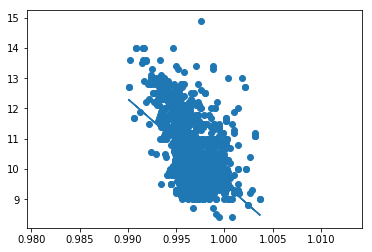

In [14]:
plt.scatter(X, Y)
plt.plot(X, clf.predict(X))

In [7]:
wine_except_quality = wine.drop('quality', axis=1)
X = wine_except_quality.as_matrix()

Y = wine['quality'].as_matrix()

In [8]:
clf = linear_model.LinearRegression()
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
dataframe = pd.DataFrame({'Name': wine_except_quality.columns,
                         'Coefficients': clf.coef_}).sort_values(by='Coefficients')
print(f'Coefficients: {dataframe}')
print(f'intercept: {clf.intercept_}')

Coefficients:     Coefficients                  Name
7     -17.881164               density
4      -1.874225             chlorides
1      -1.083590      volatile acidity
8      -0.413653                    pH
2      -0.182564           citric acid
6      -0.003265  total sulfur dioxide
5       0.004361   free sulfur dioxide
3       0.016331        residual sugar
0       0.024991         fixed acidity
10      0.276198               alcohol
9       0.916334             sulphates
intercept: 21.965208449451552


In [16]:
wine2 = wine.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205
1,-0.045986,0.241219,-0.270976,0.004191,0.017585,0.128522,0.072552,0.003915,-0.087491,0.013085,-0.095844,-0.127205
2,-0.045986,0.159027,-0.230976,-0.016357,0.007568,-0.012323,0.026616,0.018599,-0.040247,-0.004880,-0.095844,-0.127205
3,0.254899,-0.169740,0.289024,-0.043754,-0.020812,0.015846,0.047817,0.092021,-0.118987,-0.046796,-0.095844,0.072795
4,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205


In [17]:
wine2_except_quality = wine2.drop('quality', axis=1)
X = wine2_except_quality.as_matrix()
Y = wine2['quality'].as_matrix()

In [18]:
clf = linear_model.LinearRegression()
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
dataframe = pd.DataFrame({'Name': wine2_except_quality.columns,
                         'Coefficients': clf.coef_}).sort_values(by='Coefficients')
print(f'Coefficients: {dataframe}')
print(f'intercept: {clf.intercept_}')

Coefficients:     Coefficients                  Name
1      -0.316408      volatile acidity
4      -0.224532             chlorides
6      -0.184775  total sulfur dioxide
8      -0.105068                    pH
7      -0.048708               density
2      -0.036513           citric acid
3       0.047687        residual sugar
0       0.056479         fixed acidity
5       0.061931   free sulfur dioxide
9       0.306056             sulphates
10      0.359057               alcohol
intercept: 1.9140742913275465e-16
